In [290]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [291]:
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,153.160004,154.240005,151.919998,153.339996,152.435684,97943200
1,2022-11-01,155.080002,155.449997,149.130005,150.649994,149.761551,80379300
2,2022-11-02,148.949997,152.169998,145.000000,145.029999,144.174683,93604600
3,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.060959,97918500
4,2022-11-04,142.089996,142.669998,134.380005,138.380005,137.792114,140814800


In [292]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100
246,2023-10-24,173.050003,173.669998,171.449997,173.440002,173.440002,43816600
247,2023-10-25,171.880005,173.059998,170.649994,171.100006,171.100006,57157000
248,2023-10-26,170.369995,171.380005,165.669998,166.889999,166.889999,70625300
249,2023-10-27,166.910004,168.960007,166.830002,168.220001,168.220001,58499100


In [293]:
df.shape

(250, 7)

In [294]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [296]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,250.0,1.643381e+02,1.864876e+01,1.260100e+02,1.488775e+02,1.677000e+02,1.783125e+02,1.962400e+02
High,250.0,1.660052e+02,1.848374e+01,1.277700e+02,1.505450e+02,1.694050e+02,1.800525e+02,1.982300e+02
Low,250.0,1.628265e+02,1.887252e+01,1.241700e+02,1.473000e+02,1.662500e+02,1.771100e+02,1.952800e+02
Close,250.0,1.644720e+02,1.865859e+01,1.250200e+02,1.488200e+02,1.679250e+02,1.785550e+02,1.964500e+02
Adj Close,250.0,1.641287e+02,1.882746e+01,1.244889e+02,1.482444e+02,1.675617e+02,1.785541e+02,1.961851e+02
Volume,250.0,6.417777e+07,2.001017e+07,3.145820e+07,5.042202e+07,5.891015e+07,7.134730e+07,1.601569e+08


In [297]:
df['Volume'].std()

20010169.17768601

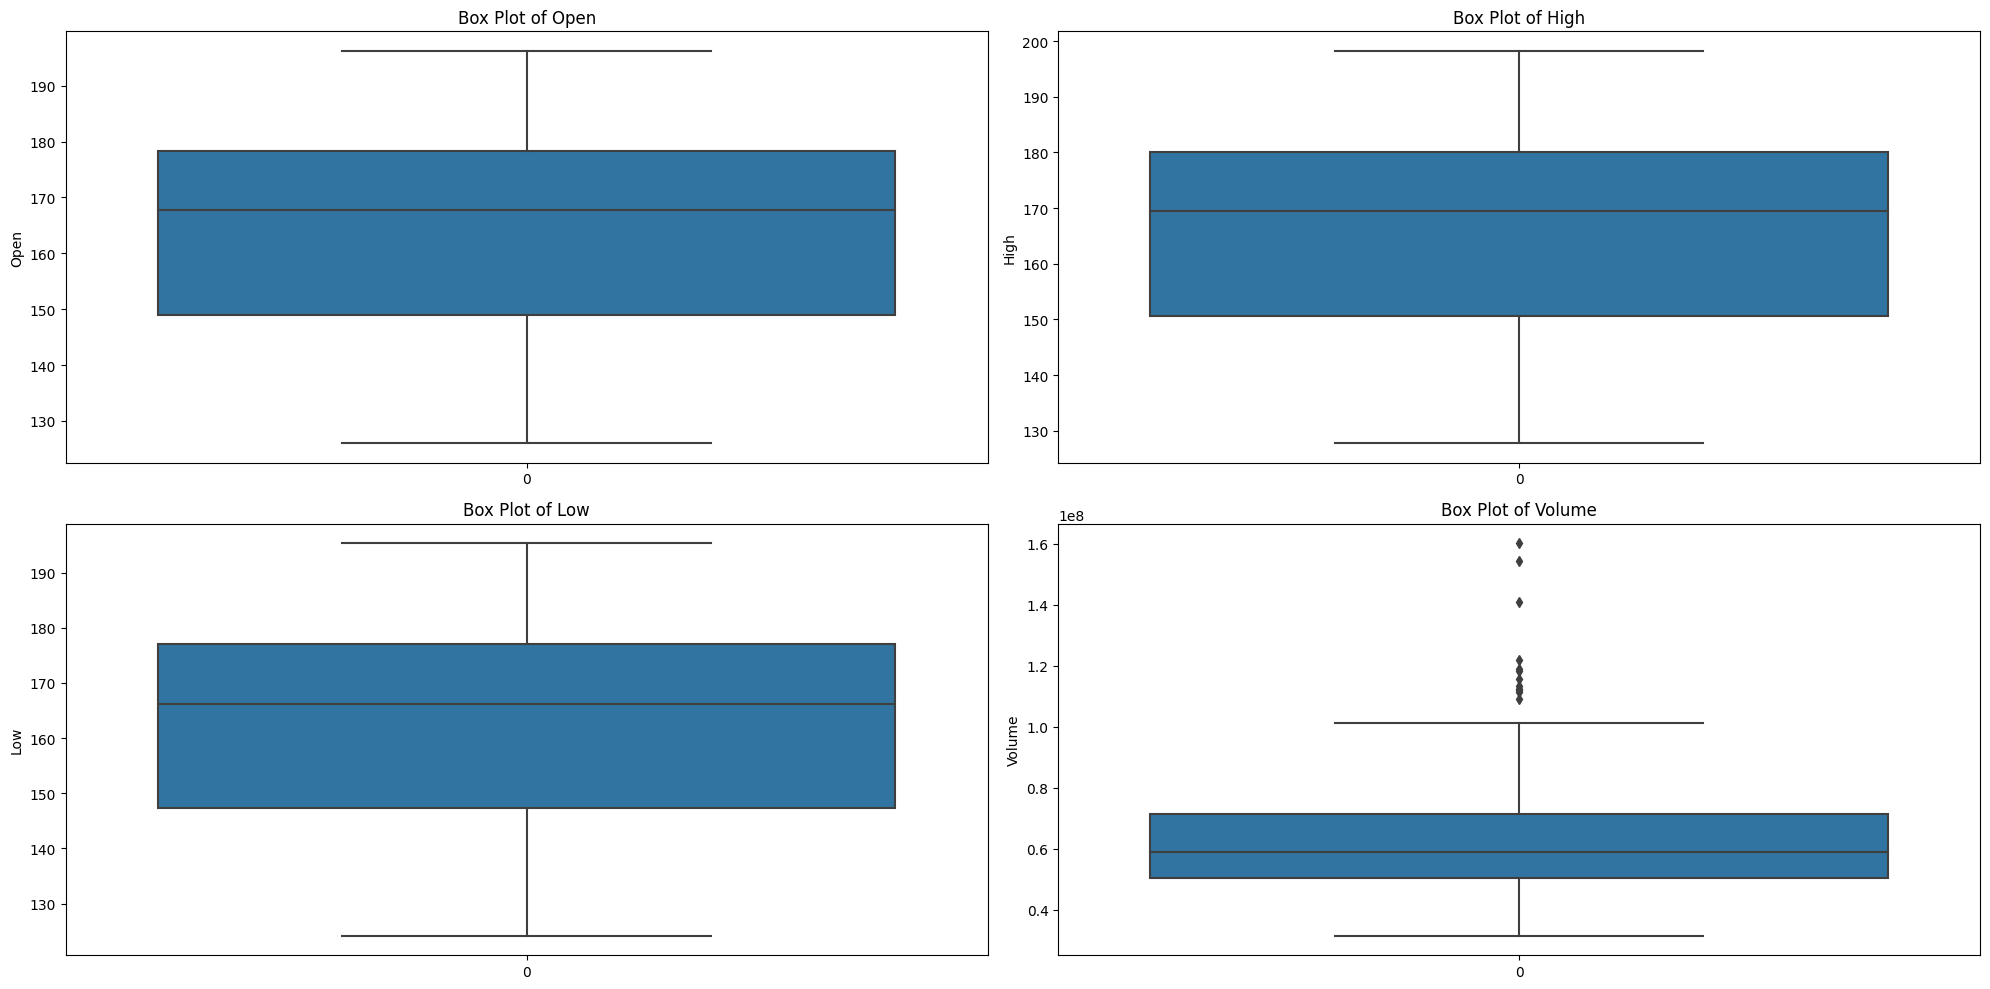

In [298]:


fig, axs = plt.subplots(2, 2, figsize=(20, 10))

columns = ['Open', 'High', 'Low', 'Volume']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(df[column], ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {column}')
    axs[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()

In [299]:
df['Volume'].std()

20010169.17768601

In [300]:
z_scores = np.abs(stats.zscore(df['Volume']))

outliers = (z_scores > 3) | (z_scores < -3)

total_outliers = np.sum(outliers)

print(f"Outliers: {total_outliers}")
df['Volume'][outliers] = df['Volume'].mean()

Outliers: 3


In [301]:
df['Volume'].std()

17494403.778358616

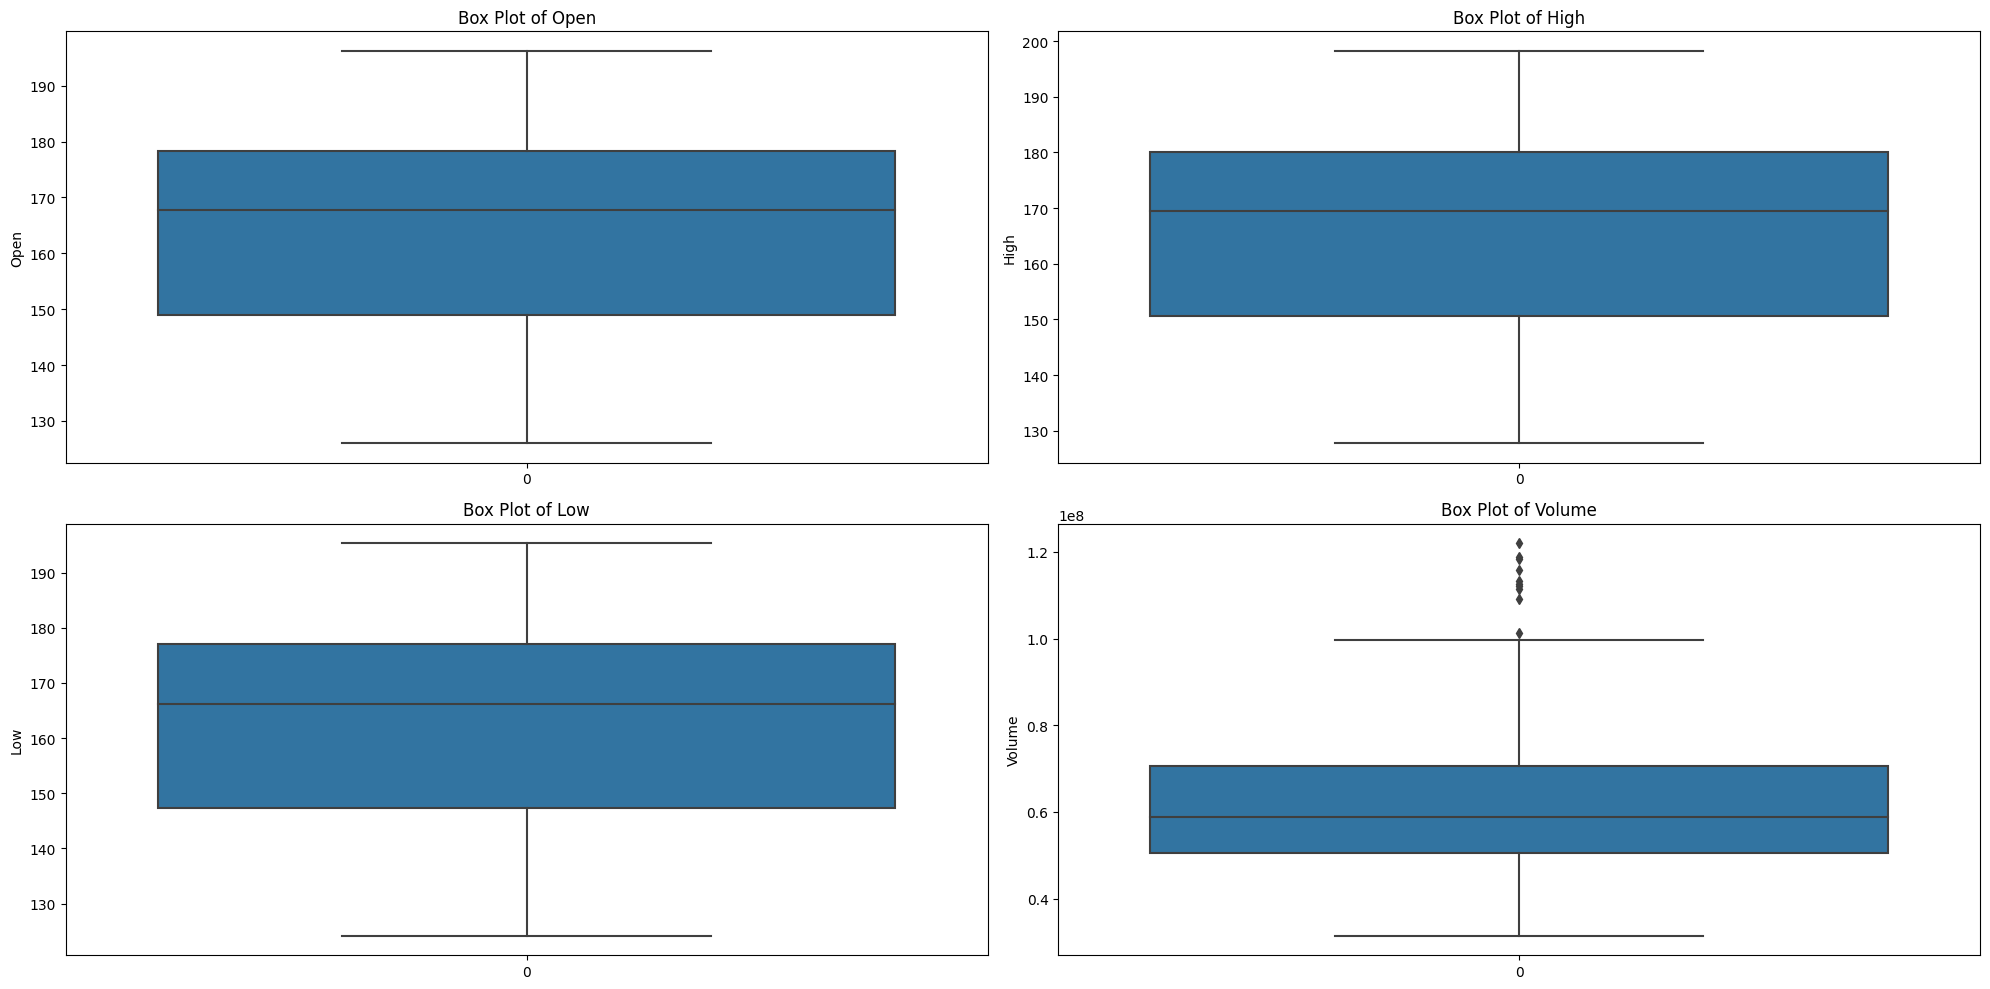

In [302]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

columns = ['Open', 'High', 'Low', 'Volume']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(df[column], ax=axs[row, col])
    axs[row, col].set_title(f'Box Plot of {column}')
    axs[row, col].set_ylabel(column)

plt.tight_layout()
plt.show()

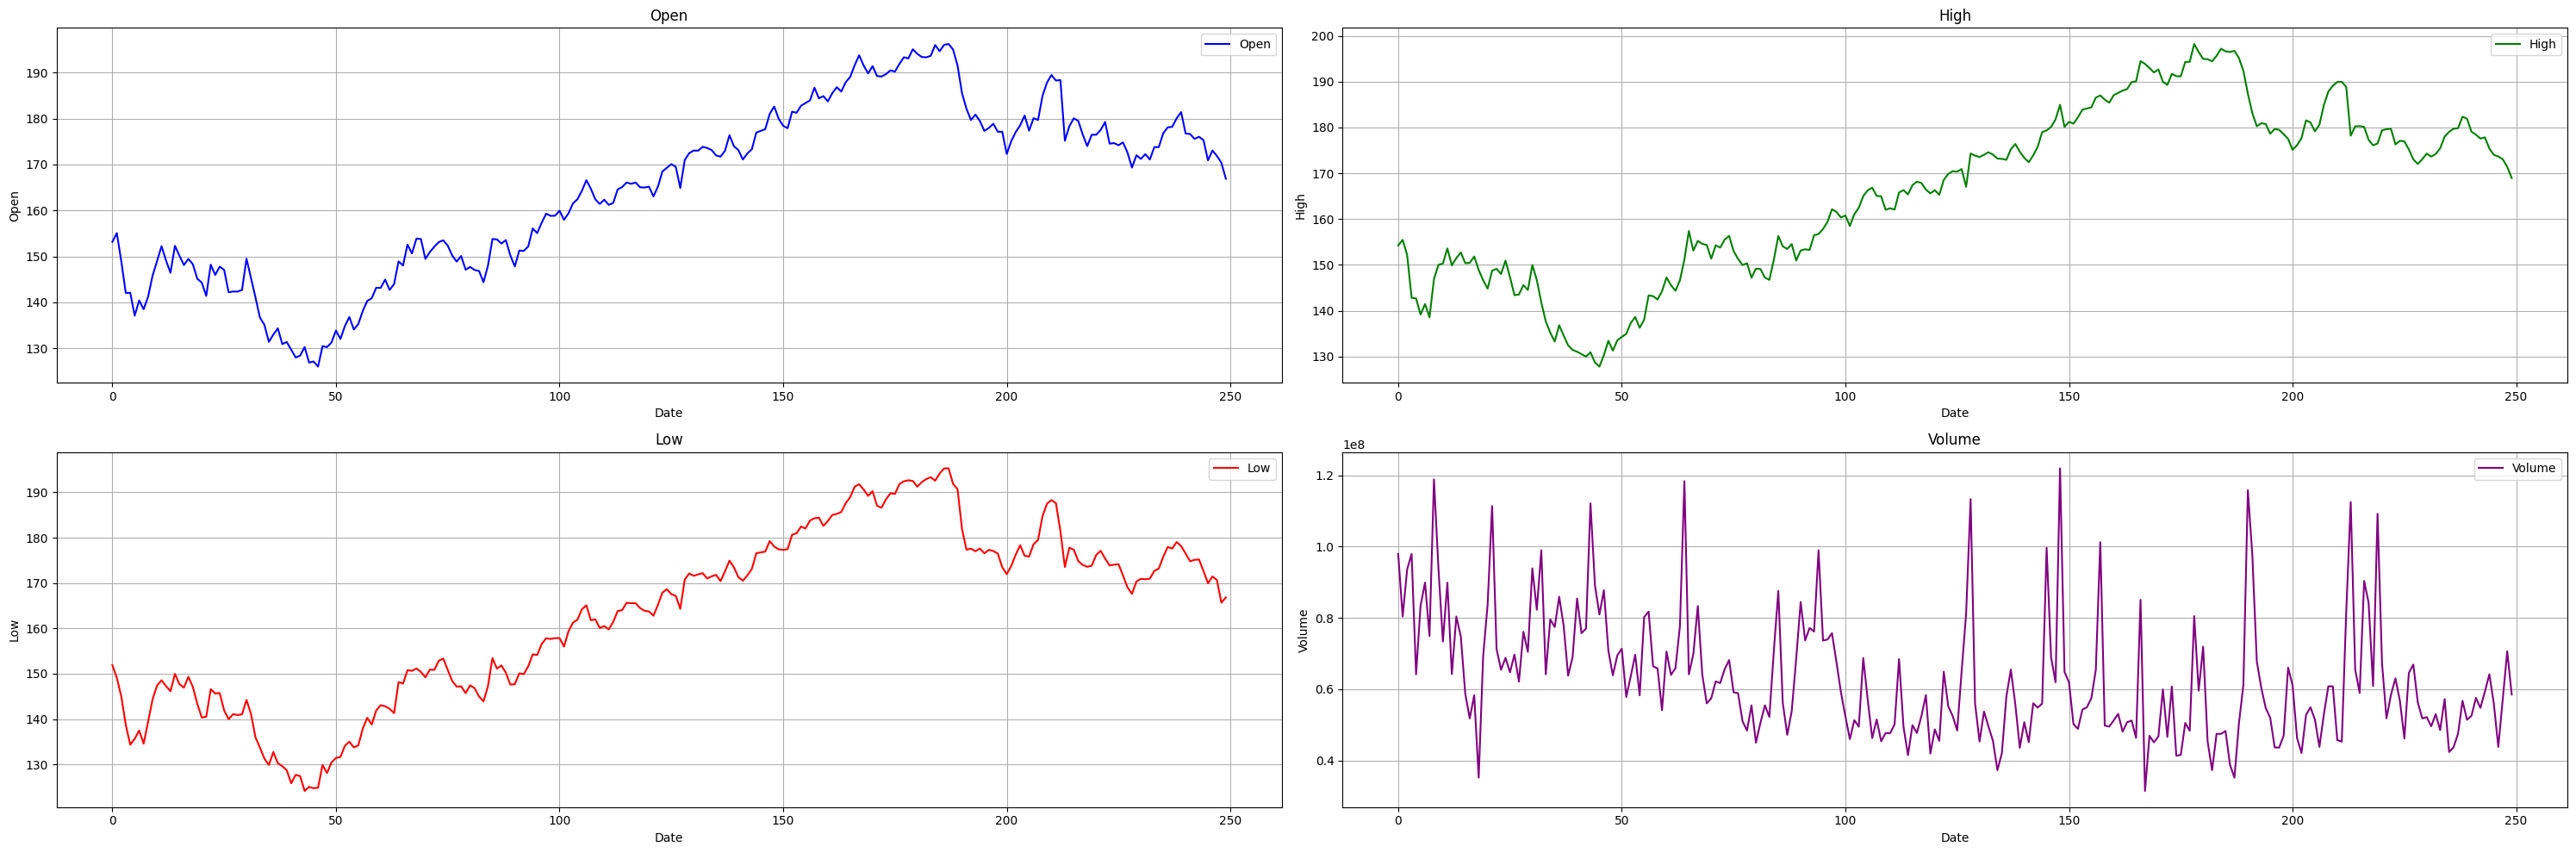

In [303]:
columns = ['Open', 'High', 'Low', 'Volume']
colors = ['blue', 'green', 'red', 'purple']

fig, axs = plt.subplots(2, 2, figsize=(30, 10))

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    axs[row, col].plot( df[column], label=column, color=colors[i])
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel(column) 
    axs[row, col].set_title(f'{column}')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()



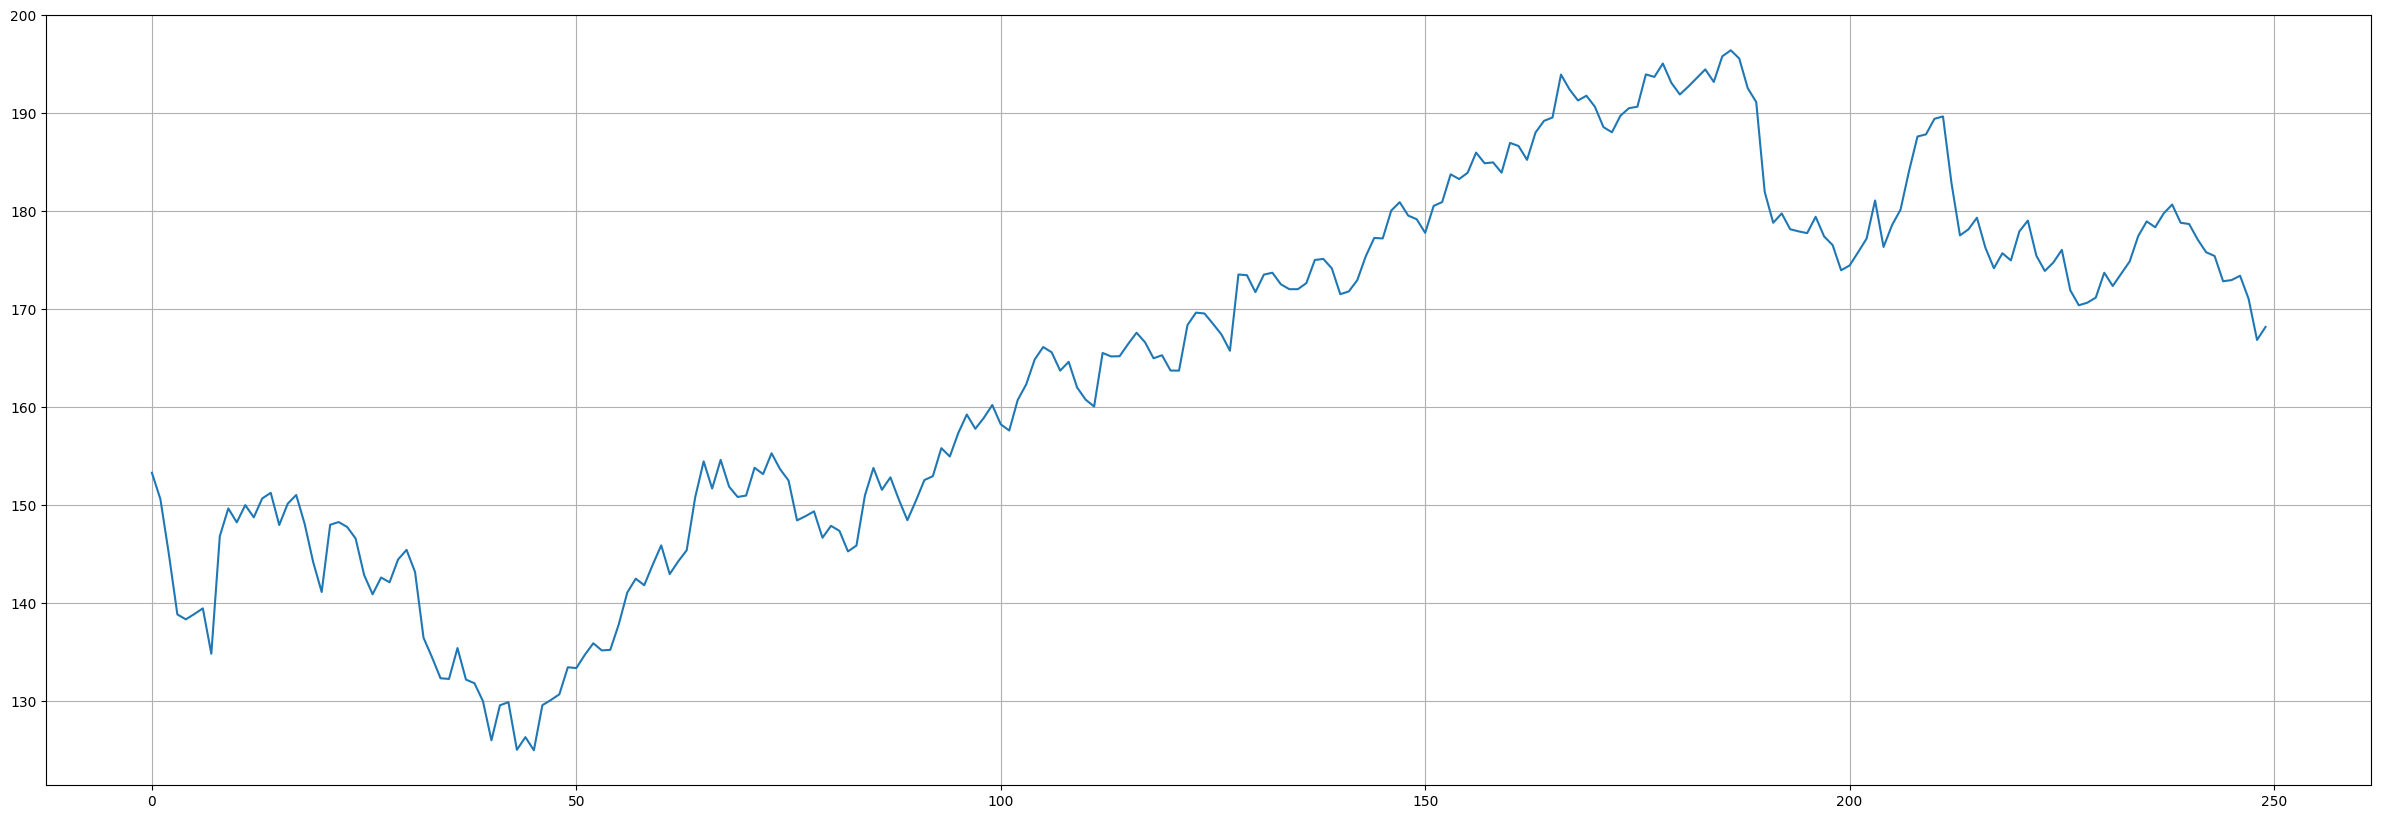

In [304]:
plt.figure(figsize=(30, 10))
plt.plot(df[['Close']])
plt.grid(True) 

In [305]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df[['Close']]  

X_train = X.iloc[:-20, :]
y_train = y.iloc[:-20, :]
X_test = X.iloc[-20:, :]
y_test = y.iloc[-20:, :]

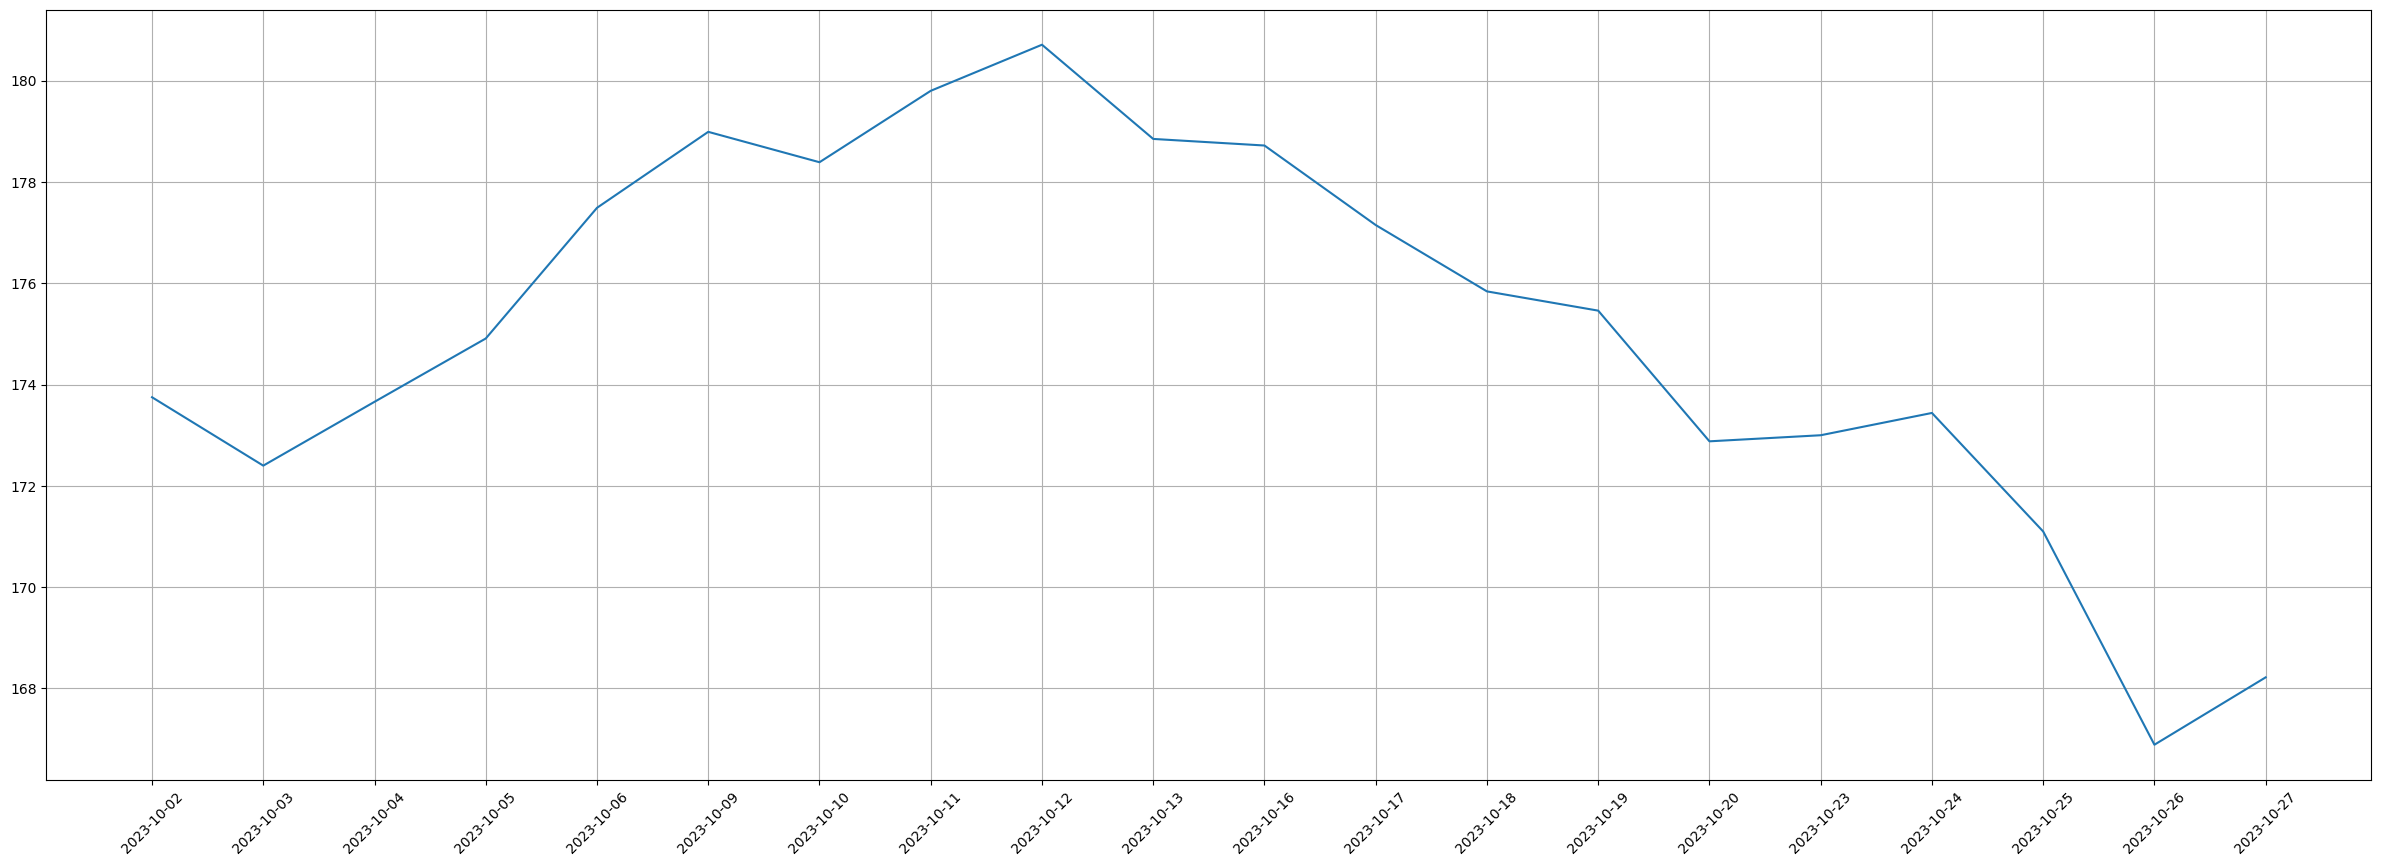

In [306]:
plt.figure(figsize=(30, 10))
plt.grid(True) 
plt.xticks(rotation=45) 
plt.plot(df['Date'][-20:],y_test)

In [307]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [308]:
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [309]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [310]:
lr_pred = lr.predict(X_test)
dtr_pred = dtr.predict(X_test)
rf_pred = rf.predict(X_test)
lr_pred = lr_pred.flatten()

print(f'lr pred: {lr_pred[-5:]}')
print(f'dtr pred: {dtr_pred[-5:]}')
print(f'rf pred: {rf_pred[-5:]}')
print(f'Actual Close: {y_test[["Close"]][-5:]}')

lr pred: [172.51396036 172.32835595 171.86676979 167.15564356 168.56945959]
dtr pred: [171.210007 171.770004 172.690002 167.449997 168.410004]
rf pred: [172.42000434 171.96020302 172.30000239 168.32679807 167.93580042]
Actual Close:           Close
245  173.000000
246  173.440002
247  171.100006
248  166.889999
249  168.220001


In [311]:
lr_score = lr.score(X_test,y_test)
dtr_score = dtr.score(X_test,y_test)
rf_score = rf.score(X_test,y_test)

print(f'lr score: {lr_score}')
print(f'dtr score: {dtr_score}')
print(f'rf score: {rf_score}')

lr score: 0.9620303805172207
dtr score: 0.8687452348716163
rf score: 0.9280071044768792


In [312]:

mse_lr = mean_squared_error(y_test, lr_pred)
mse_dtr = mean_squared_error(y_test, dtr_pred)
mse_rf = mean_squared_error(y_test, rf_pred)

r2_lr = r2_score(y_test, lr_pred)
r2_dtr = r2_score(y_test, dtr_pred)
r2_rf = r2_score(y_test, rf_pred)

print("lr Mean Squared Error (MSE):", mse_lr)
print("lr R^2 Score:", r2_lr)
print("\n")

print("dtr Mean Squared Error (MSE):", mse_dtr)
print("dtr R^2 Score:", r2_dtr)
print("\n")

print("rf Mean Squared Error (MSE):", mse_rf)
print("rf R^2 Score:", r2_rf)

lr Mean Squared Error (MSE): 0.5151067005654661
lr R^2 Score: 0.9620303805172207


dtr Mean Squared Error (MSE): 1.780639625041299
dtr R^2 Score: 0.8687452348716163


rf Mean Squared Error (MSE): 0.9766761790670074
rf R^2 Score: 0.9280071044768792


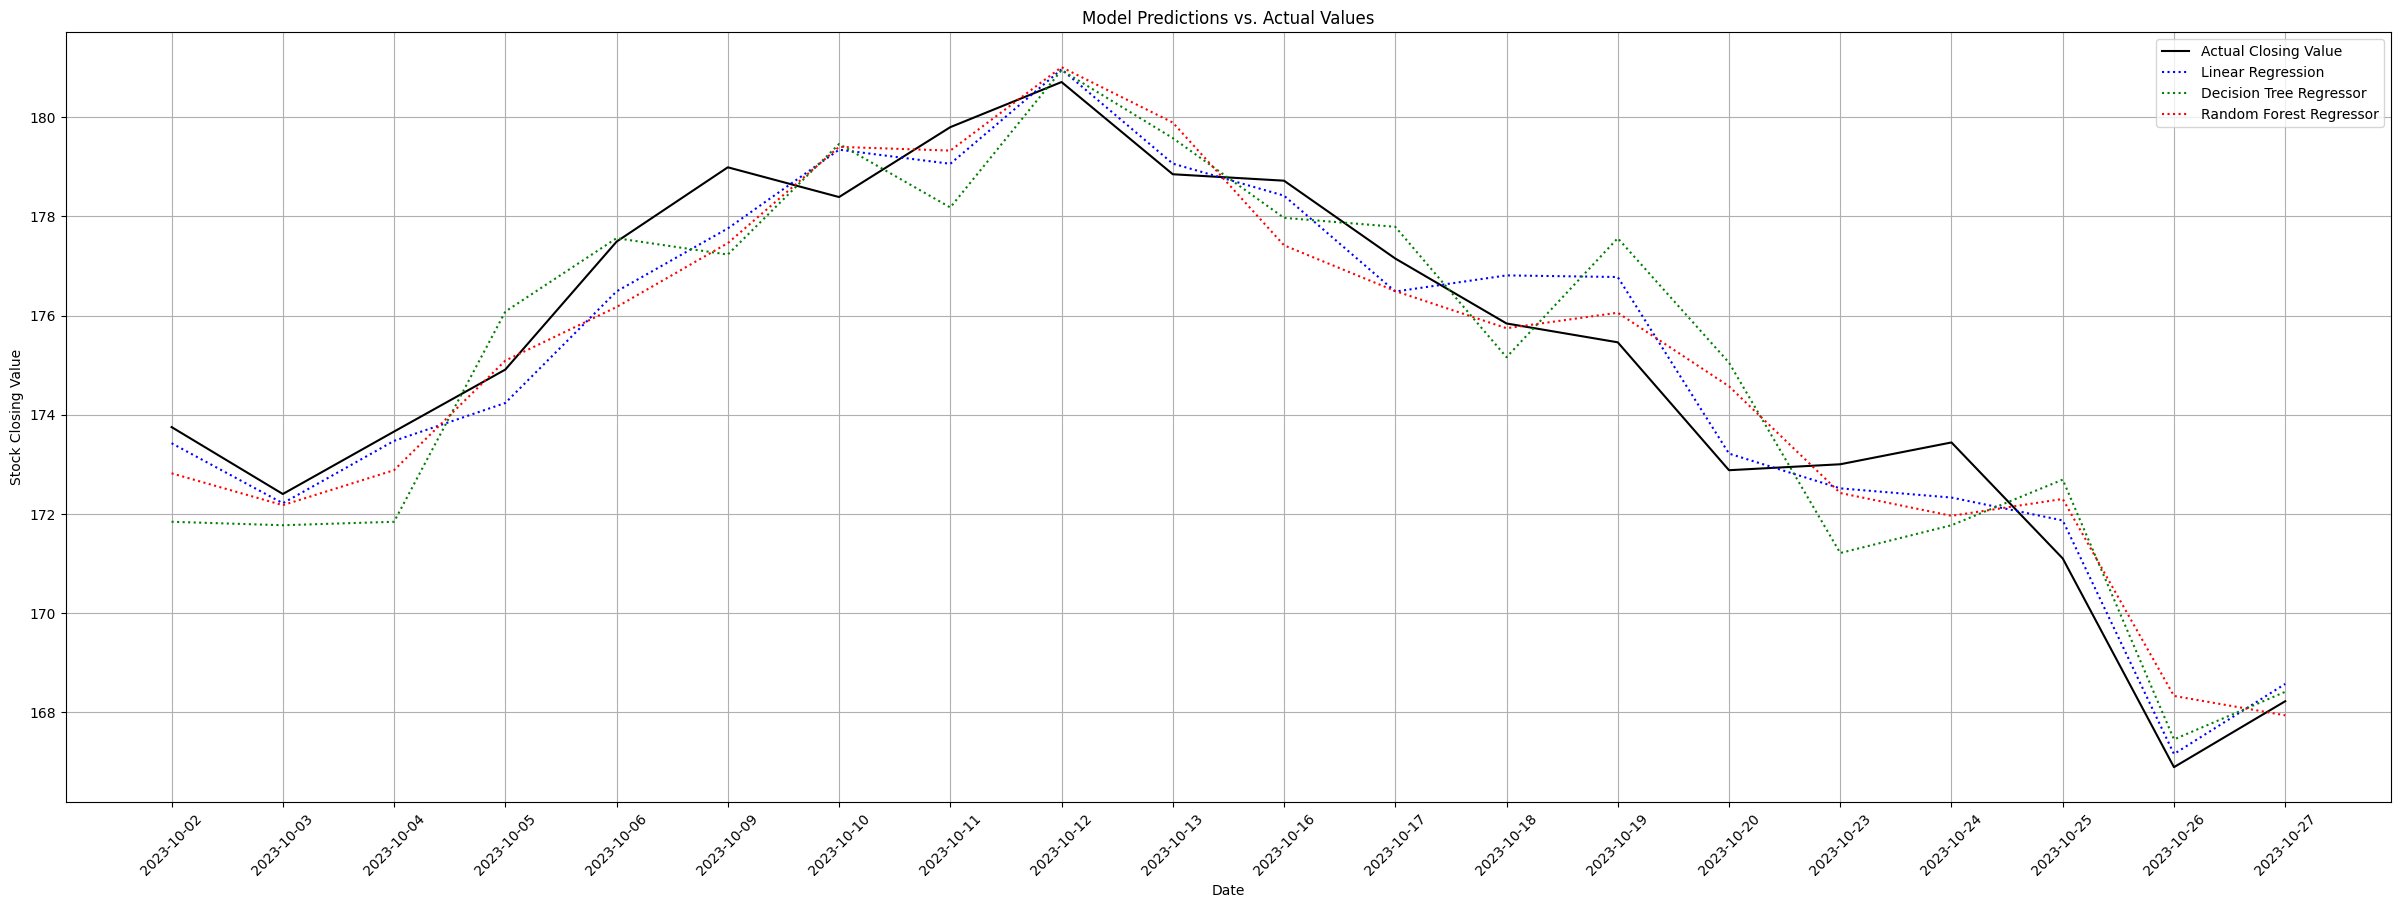

In [313]:
dates = df['Date'][-20:]

plt.figure(figsize=(30, 10))

plt.plot(dates, y_test.values, label='Actual Closing Value', color='black')
plt.plot(dates, lr_pred, label='Linear Regression', color='blue', linestyle='dotted')
plt.plot(dates, dtr_pred, label='Decision Tree Regressor', color='green', linestyle='dotted')
plt.plot(dates, rf_pred, label='Random Forest Regressor', color='red', linestyle='dotted')

plt.xlabel('Date')
plt.ylabel('Stock Closing Value')
plt.legend()
plt.title('Model Predictions vs. Actual Values')
plt.grid(True)  
plt.xticks(rotation=45) 
plt.show()

In [314]:
test_02_11_2023 = [[175.52,177.78,175.46,76083900]]
close_02_11_23 = [177.57]

lr_pred_test = lr.predict(test_02_11_2023)
dtr_pred_test = dtr.predict(test_02_11_2023)
rf_pred_test = rf.predict(test_02_11_2023)

print(f'Close {close_02_11_23}')
print(f'lr pred: {lr_pred_test}')
print(f'dtr pred: {dtr_pred_test}')
print(f'rf pred: {rf_pred_test}')

Close [177.57]
lr pred: [[177.25091368]]
dtr pred: [177.559998]
rf pred: [176.06040106]
